### Project to use text from Shakespeare (Shakespeare’s first sonnet) to train a recurrent neural network (RNN) for language modelling.

In [1]:
## import libraries
import pandas as pd
import livelossplot
import keras
from keras import Sequential, datasets
import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
#Read the text file as separate lines of text
with open('1707783720945_shakespeare.txt', 'r') as file:
    text = file.read()
    lines = text.lower().split('\n')
lines    

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou contracted to thine own bright eyes,',
 "feed'st thy light's flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thy self thy foe, to thy sweet self too cruel:',
 "thou that art now the world's fresh ornament,",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content,',
 "and, tender churl, mak'st waste in niggarding:",
 '   pity the world, or else this glutton be,',
 "   to eat the world's due, by the grave and thee.",
 'when forty winters shall besiege thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery so gazed on now,",
 'will be a tattered weed of small worth held:',
 'then being asked, where all thy beauty lies,',
 'where all the treasure of thy lusty days;',
 'to say, within thine own deep sunken e

In [7]:
##Define words, vocabulary size and sequences of words as lines
# By default, the text_to_word_sequence function: 1) Removes all punctuation including tabs and newlines.
# 2) Converts all words to lower case. 3) Splits the input string into words using space as the separator.

from keras.preprocessing.text import text_to_word_sequence, Tokenizer
words = text_to_word_sequence(text)

#Tokenize Input Text  to convert the input text into indexed tokens.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
vocabulary_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(lines)
sequences

[[26, 189, 190, 191, 97, 98],
 [6, 99, 27, 192, 100, 101, 43],
 [18, 34, 2, 193, 57, 35, 36, 194],
 [14, 102, 103, 100, 104, 14, 195],
 [18, 1, 196, 5, 15, 66, 197, 58],
 [198, 3, 199, 200, 12, 10, 201, 202],
 [203, 28, 204, 37, 205, 105],
 [3, 10, 3, 206, 5, 3, 44, 10, 106, 207],
 [1, 6, 23, 45, 2, 107, 67, 208],
 [4, 209, 210, 5, 2, 211, 212],
 [108, 15, 66, 213, 214, 3, 215],
 [4, 102, 216, 217, 109, 7, 218],
 [219, 2, 24, 38, 110, 46, 220, 11],
 [5, 221, 2, 107, 222, 35, 2, 223, 4, 9],
 [16, 224, 225, 68, 226, 3, 227],
 [4, 228, 111, 229, 7, 3, 27, 230],
 [3, 231, 232, 233, 19, 234, 39, 45],
 [47, 11, 28, 235, 236, 8, 237, 238, 239],
 [29, 69, 240, 37, 30, 3, 20, 105],
 [37, 30, 2, 70, 8, 3, 112, 241],
 [5, 242, 108, 15, 66, 111, 243, 58],
 [40, 71, 30, 244, 72, 4, 245, 113],
 [73, 114, 74, 113, 246, 3, 27, 75],
 [21, 1, 247, 248, 14, 76, 115, 8, 249],
 [68, 116, 77, 117, 4, 31, 77, 118, 250, 251],
 [252, 14, 20, 35, 253, 15],
 [46, 40, 5, 11, 119, 120, 16, 1, 23, 118],
 [4, 48, 3,

In [5]:
## Find subsequences 
subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)):
       subsequence = sequence[:i+1]
       subsequences.append(subsequence)
        
subsequences

[[26, 189],
 [26, 189, 190],
 [26, 189, 190, 191],
 [26, 189, 190, 191, 97],
 [26, 189, 190, 191, 97, 98],
 [6, 99],
 [6, 99, 27],
 [6, 99, 27, 192],
 [6, 99, 27, 192, 100],
 [6, 99, 27, 192, 100, 101],
 [6, 99, 27, 192, 100, 101, 43],
 [18, 34],
 [18, 34, 2],
 [18, 34, 2, 193],
 [18, 34, 2, 193, 57],
 [18, 34, 2, 193, 57, 35],
 [18, 34, 2, 193, 57, 35, 36],
 [18, 34, 2, 193, 57, 35, 36, 194],
 [14, 102],
 [14, 102, 103],
 [14, 102, 103, 100],
 [14, 102, 103, 100, 104],
 [14, 102, 103, 100, 104, 14],
 [14, 102, 103, 100, 104, 14, 195],
 [18, 1],
 [18, 1, 196],
 [18, 1, 196, 5],
 [18, 1, 196, 5, 15],
 [18, 1, 196, 5, 15, 66],
 [18, 1, 196, 5, 15, 66, 197],
 [18, 1, 196, 5, 15, 66, 197, 58],
 [198, 3],
 [198, 3, 199],
 [198, 3, 199, 200],
 [198, 3, 199, 200, 12],
 [198, 3, 199, 200, 12, 10],
 [198, 3, 199, 200, 12, 10, 201],
 [198, 3, 199, 200, 12, 10, 201, 202],
 [203, 28],
 [203, 28, 204],
 [203, 28, 204, 37],
 [203, 28, 204, 37, 205],
 [203, 28, 204, 37, 205, 105],
 [3, 10],
 [3, 10, 

In [10]:
#Padding your sequences , to pad the subsequences with zeros so that all sequences are made the same size
#The padding='pre' parameter tells the function to add padding at the beginning of each sequence.
from keras.preprocessing.sequence import pad_sequences
sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')
sequences

array([[  0,   0,   0, ...,   0,  26, 189],
       [  0,   0,   0, ...,  26, 189, 190],
       [  0,   0,   0, ..., 189, 190, 191],
       ...,
       [  0,   0, 578, ...,  16,  81, 579],
       [  0, 578, 160, ...,  81, 579,   9],
       [578, 160,   5, ..., 579,   9, 580]], dtype=int32)

In [16]:
##Build Input and Output ; Encode the target labels

from tensorflow.keras.utils import to_categorical
x, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary_size)

print(x, y)

[[  0   0   0 ...   0   0  26]
 [  0   0   0 ...   0  26 189]
 [  0   0   0 ...  26 189 190]
 ...
 [  0   0 578 ... 150  16  81]
 [  0 578 160 ...  16  81 579]
 [578 160   5 ...  81 579   9]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [21]:
## NLP Using Keras : RNN
from keras.models import Sequential
model = Sequential()

from keras.layers import Embedding
model.add(Embedding(vocabulary_size, 100, input_length=sequence_length - 1))

from keras.layers import LSTM
model.add(LSTM(100))

from keras.layers import Dropout
model.add(Dropout(0.1))

from keras.layers import Dense
model.add(Dense(units=vocabulary_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model.fit(x, y, epochs=500)


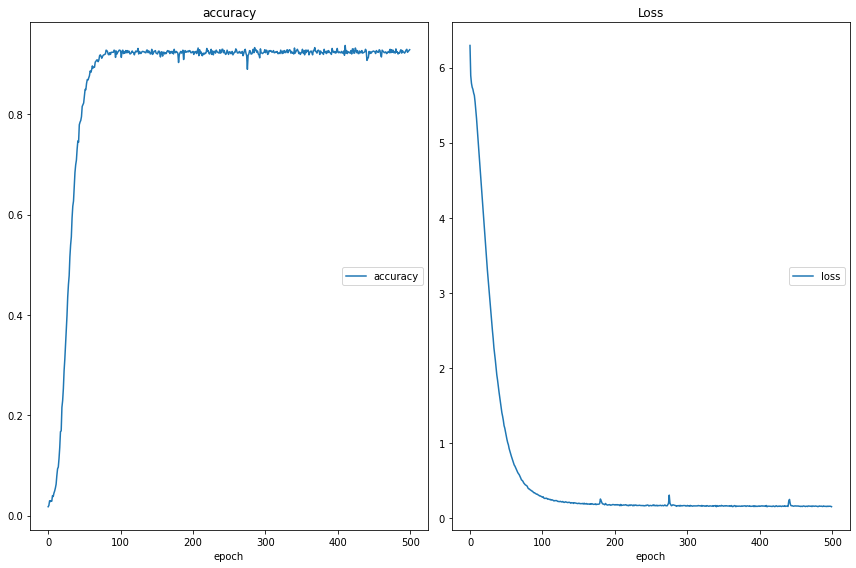

accuracy
	accuracy         	 (min:    0.018, max:    0.937, cur:    0.929)
Loss
	loss             	 (min:    0.152, max:    6.294, cur:    0.153)


In [22]:
from livelossplot import PlotLossesKeras
model.fit(x, y,
          epochs=500, batch_size=32,
          callbacks=[PlotLossesKeras()],
          verbose=0) #validation_data=(x_test, y_test),


In [27]:
## Save model 
import joblib
model.save('Shakespeare_NLP_model.keras')